In [120]:
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd
import os
#import pm4py

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import plot_tree
# nice plots & tables
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# to make a counter object
from collections import Counter

In [121]:
df = pd.read_csv("C:\\Users\\20203666\\Documents\\JBG050-data\\Data\\all_search.csv")
df

C:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0,Person search,2014-03-31T23:05:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Not Stated (NS),Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,NaN
1,1,Person search,2014-03-31T23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,NaN
2,2,Person search,2014-03-31T23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,NaN
3,3,Person search,2014-03-31T23:05:00+00:00,NaN,NaN,50.813747,-1.078507,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found - no further action,NaN,NaN
4,4,Person search,2014-03-31T23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898959,2898959,Person and Vehicle search,2021-10-31T23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
2898960,2898960,Person search,2021-10-31T23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2898961,2898961,Person search,2021-10-31T23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,25-34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2898962,2898962,Person search,2021-10-31T23:40:00+00:00,False,NaN,53.850550,-1.840857,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Controlled drugs,A no further action disposal,True,False


In [154]:
df['Date'] = pd.to_datetime(df['Date'])
df['day of week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['hour'] = df['Date'].dt.hour
df['Latitude2'] = df['Latitude']-50
df['year'] = df['Date'].dt.year -2010
df = df[df['Longitude'].notnull()]
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,...,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,day of week,month,hour,Latitude2,year
0,1,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,0,3,23,0.844310,4
1,2,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,0,3,23,0.844310,4
2,3,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.813747,-1.078507,Male,over 34,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,NaN,NaN,0,3,23,0.813747,4
3,4,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,0,3,23,0.844310,4
4,5,Person search,2014-03-31 23:45:00+00:00,NaN,NaN,50.914817,-1.329434,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,NaN,NaN,0,3,23,0.914817,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204684,2898959,Person and Vehicle search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,True,False,6,10,23,3.777483,11
2204685,2898960,Person search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,False,False,6,10,23,3.777483,11
2204686,2898961,Person search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,25-34,Asian/Asian British - Pakistani,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,False,False,6,10,23,3.777483,11
2204687,2898962,Person search,2021-10-31 23:40:00+00:00,False,NaN,53.850550,-1.840857,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,...,Police and Criminal Evidence Act 1984 (section 1),Controlled drugs,Nothing found,True,False,6,10,23,3.850550,11


In [123]:
df.loc[((df['Outcome']=='A no further action disposal')|(df['Outcome']=='Nothing found - no further action')), 'Outcome'] = 'Nothing found'
df.loc[(df['Outcome']=='Suspect arrested'), 'Outcome'] = 'Arrest'
df.loc[(df['Outcome']=='Local resolution'), 'Outcome'] = 'Community resolution'
df.loc[((df['Outcome']=='Offender given drugs possession warning')|(df['Outcome']=='Khat or Cannabis warning')|(df['Outcome']=='Caution (simple or conditional)')|(df['Outcome']=='Offender cautioned')|(df['Outcome']=='Suspected psychoactive substances seized - No further action')), 'Outcome'] = 'Warning'
df.loc[((df['Outcome']=='Summons / charged by post')|(df['Outcome']=='Suspect summonsed to court')), 'Outcome'] = 'Summons'
df.loc[((df['Outcome']=='Penalty Notice for Disorder')|(df['Outcome']=='Offender given penalty notice')), 'Outcome'] = 'Fine'
df = df[df['Outcome']!='Article found - Detailed outcome unavailable']
df.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
ethnicities = ['White - English/Welsh/Scottish/Northern Irish/British',
               'Other ethnic group - Not stated',
               'White - White British (W1)',
               'White - Any other White background',
               'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
               'Black/African/Caribbean/Black British - African',
               'Asian/Asian British - Any other Asian background',
               'Black/African/Caribbean/Black British - Caribbean',
               'Asian/Asian British - Pakistani',
               'Asian/Asian British - Bangladeshi',
               'Not Stated (NS)',
               'Other ethnic group - Any other ethnic group',
               'White - Any other White ethnic background (W9)',
               'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
               'Asian/Asian British - Indian',

               'Mixed/Multiple ethnic groups - White and Black Caribbean',
               'Black or Black British - Caribbean (B1)',
               'Black or Black British - Any other Black ethnic background (B9)',
               'Black or Black British - African (B2)',

               'Asian or Asian British - Pakistani (A2)',
               'White - Irish',
               'Asian or Asian British - Any other Asian ethnic background (A9)',

               'Mixed/Multiple ethnic groups - White and Black African',
               'Asian or Asian British - Indian (A1)',
               'Mixed - White and Black Caribbean (M1)',
               'Mixed/Multiple ethnic groups - White and Asian',
               'Asian or Asian British - Bangladeshi (A3)',
               'Chinese or other ethnic group - Any other ethnic group (O9)',
               'Mixed - Any other Mixed ethnic background (M9)',
               'White - Gypsy or Irish Traveller',
               'White - White Irish (W2)',
               'Asian/Asian British - Chinese',
               'Mixed - White and Black African (M2)',
               'Mixed - White and Asian (M3)',
               'Chinese or other ethnic group - Chinese (O1)',
               'Other ethnic group - Arab']

eth_w =['White - English/Welsh/Scottish/Northern Irish/British','White - White British (W1)','White - Any other White background',
        'White - Any other White ethnic background (W9)','White - Irish','White - Gypsy or Irish Traveller',
        'White - White Irish (W2)',]

eth_b= ['Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
        'Black/African/Caribbean/Black British - African','Black/African/Caribbean/Black British - Caribbean','Black or Black British - Caribbean (B1)','Black or Black British - Any other Black ethnic background (B9)',
        'Black or Black British - African (B2)',]

eth_a= ['Asian/Asian British - Any other Asian background','Asian/Asian British - Pakistani',
        'Asian/Asian British - Bangladeshi','Asian/Asian British - Indian','Asian or Asian British - Pakistani (A2)',
        'Asian or Asian British - Any other Asian ethnic background (A9)','Asian or Asian British - Indian (A1)',
        'Asian or Asian British - Bangladeshi (A3)','Chinese or other ethnic group - Any other ethnic group (O9)',
        'Asian/Asian British - Chinese','Chinese or other ethnic group - Chinese (O1)',]

eth_o= ['Other ethnic group - Not stated','Not Stated (NS)','Other ethnic group - Any other ethnic group','Other ethnic group - Arab']

eth_m= ['Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
        'Mixed/Multiple ethnic groups - White and Black Caribbean','Mixed/Multiple ethnic groups - White and Black African',
        'Mixed - White and Black Caribbean (M1)','Mixed/Multiple ethnic groups - White and Asian',
        'Mixed - Any other Mixed ethnic background (M9)','Mixed - White and Black African (M2)','Mixed - White and Asian (M3)']

all_eth = [eth_w,eth_b,eth_a,eth_o,eth_m]

In [181]:
i=0
for eth in all_eth:
    for cat in eth:
        if i==0:
            df.loc[(df['Self-defined ethnicity']==cat), 'Self-defined ethnicity'] = 'White'
        if i==1:
            df.loc[(df['Self-defined ethnicity']==cat), 'Self-defined ethnicity'] = 'Black'
        if i==2:
            df.loc[(df['Self-defined ethnicity']==cat), 'Self-defined ethnicity'] = 'Asian'
        if i==3:
            df.loc[(df['Self-defined ethnicity']==cat), 'Self-defined ethnicity'] = 'Other / nan'
        if i==4:
            df.loc[(df['Self-defined ethnicity']==cat), 'Self-defined ethnicity'] = 'Mixed'
    i+=1
df.loc[df['Self-defined ethnicity'].isnull(), 'Self-defined ethnicity']= 'Other / nan'

In [182]:
df['Self-defined ethnicity'].value_counts()


White          1137834
Other / nan     410562
Black           353861
Asian           232098
Mixed            70334
Name: Self-defined ethnicity, dtype: int64

In [185]:
df['result'] = 'ö'
df.loc[df['Outcome']=='Nothing found', 'result'] = 'Nothing found'

In [186]:
df.loc[df['Outcome']!='Nothing found', 'result'] = df.loc[df['Outcome']!='Nothing found', 'Object of search']

In [ ]:
df['result'].value_counts()

AttributeError: module 'numpy' has no attribute 'T'

In [190]:
df.loc[((df['result']=='Controlled drugs')|(df['result']=='Psychoactive substances')), 'result'] = 'Drugs'
df.loc[(df['result']=='Goods on which duty has not been paid etc.'), 'result'] = 'Stolen goods'
df.loc[((df['result']=='Offensive weapons')|(df['result']=='Anything to threaten or harm anyone')|(df['result']=='Firearms')
        |(df['result']=='Fireworks')|(df['result']=='Crossbows')|(df['result']=='Seals or hunting equipment')), 'result'] = 'Weapons'
df.loc[((df['result']=='Articles for use in criminal damage')|(df['result']=='Article for use in theft')
        |(df['result']=='Game or poaching equipment')), 'result'] = 'Forbidden articles'
df.loc[((df['result']=='Evidence of offences under the Act')|(df['result']=='Evidence of wildlife offences')
        |(df['result']=='Evidence of hunting any wild mammal with a dog')), 'result'] = 'Evidence'
df = df[df['result']!='Detailed object of search unavailable']
df.reset_index(drop=True, inplace=True)

In [215]:
list(df['result'].unique())

['Nothing found',
 'Drugs',
 'Stolen goods',
 'Forbidden articles',
 'Weapons',
 nan,
 'Evidence']

In [192]:
df

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,...,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,day of week,month,hour,Latitude2,year,Self-defined ethnicity1,result
0,1,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White,...,Nothing found,NaN,NaN,0,3,23,0.844310,4,White,Nothing found
1,2,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White,...,Nothing found,NaN,NaN,0,3,23,0.844310,4,White,Nothing found
2,3,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.813747,-1.078507,Male,over 34,White,...,Nothing found,NaN,NaN,0,3,23,0.813747,4,White,Nothing found
3,4,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White,...,Nothing found,NaN,NaN,0,3,23,0.844310,4,White,Nothing found
4,5,Person search,2014-03-31 23:45:00+00:00,NaN,NaN,50.914817,-1.329434,Male,18-24,White,...,Nothing found,NaN,NaN,0,3,23,0.914817,4,White,Nothing found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204354,2898959,Person and Vehicle search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White,...,Nothing found,True,False,6,10,23,3.777483,11,White,Nothing found
2204355,2898960,Person search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White,...,Nothing found,False,False,6,10,23,3.777483,11,White,Nothing found
2204356,2898961,Person search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,25-34,Asian,...,Nothing found,False,False,6,10,23,3.777483,11,Asian,Nothing found
2204357,2898962,Person search,2021-10-31 23:40:00+00:00,False,NaN,53.850550,-1.840857,Male,18-24,White,...,Nothing found,True,False,6,10,23,3.850550,11,White,Nothing found


In [196]:
df = df[['Type','Date', 'Latitude2', 'Longitude', 'Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity', 'day of week', 'month', 'hour', 'year', 'Legislation', 'Object of search', 'Outcome', 'result']]
df

,Type,Date,Latitude2,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,day of week,month,hour,year,Legislation,Object of search,Outcome,result
0,Person search,2014-03-31 23:05:00+00:00,0.844310,-1.067920,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,Nothing found
1,Person search,2014-03-31 23:05:00+00:00,0.844310,-1.067920,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,Nothing found
2,Person search,2014-03-31 23:05:00+00:00,0.813747,-1.078507,Male,over 34,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,Nothing found
3,Person search,2014-03-31 23:05:00+00:00,0.844310,-1.067920,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,Nothing found
4,Person search,2014-03-31 23:45:00+00:00,0.914817,-1.329434,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,Nothing found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204354,Person and Vehicle search,2021-10-31 23:20:00+00:00,3.777483,-1.776611,Male,18-24,White,White,6,10,23,11,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,Nothing found
2204355,Person search,2021-10-31 23:20:00+00:00,3.777483,-1.776611,Male,18-24,White,White,6,10,23,11,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,Nothing found
2204356,Person search,2021-10-31 23:20:00+00:00,3.777483,-1.776611,Male,25-34,Asian,Asian,6,10,23,11,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,Nothing found
2204357,Person search,2021-10-31 23:40:00+00:00,3.850550,-1.840857,Male,18-24,White,White,6,10,23,11,Police and Criminal Evidence Act 1984 (section 1),Controlled drugs,Nothing found,Nothing found


In [203]:
df1 = df.dropna()
df1.reset_index(drop=True, inplace=True)

In [204]:
df1

,Type,Date,Latitude2,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,day of week,month,hour,year,Legislation,Object of search,Outcome,result
0,Person search,2014-03-31 23:05:00+00:00,0.844310,-1.067920,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,Nothing found
1,Person search,2014-03-31 23:05:00+00:00,0.844310,-1.067920,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,Nothing found
2,Person search,2014-03-31 23:05:00+00:00,0.813747,-1.078507,Male,over 34,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,Nothing found
3,Person search,2014-03-31 23:05:00+00:00,0.844310,-1.067920,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,Nothing found
4,Person search,2014-03-31 23:45:00+00:00,0.914817,-1.329434,Male,18-24,White,White,0,3,23,4,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,Nothing found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634620,Person and Vehicle search,2021-10-31 23:20:00+00:00,3.777483,-1.776611,Male,18-24,White,White,6,10,23,11,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,Nothing found
1634621,Person search,2021-10-31 23:20:00+00:00,3.777483,-1.776611,Male,18-24,White,White,6,10,23,11,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,Nothing found
1634622,Person search,2021-10-31 23:20:00+00:00,3.777483,-1.776611,Male,25-34,Asian,Asian,6,10,23,11,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,Nothing found
1634623,Person search,2021-10-31 23:40:00+00:00,3.850550,-1.840857,Male,18-24,White,White,6,10,23,11,Police and Criminal Evidence Act 1984 (section 1),Controlled drugs,Nothing found,Nothing found


In [144]:
def balance_dataset(max_class, column):
    unique = list(df[column].unique())
    df_nf = df[df[column]==unique[0]].sample(frac=1)[:max_class]
    df_arr = df[df[column]==unique[1]].sample(frac=1)[:max_class]
    df_cr = df[df[column]==unique[2]].sample(frac=1)[:max_class]
    df_war = df[df[column]==unique[3]].sample(frac=1)[:max_class]
    df_sum = df[df[column]==unique[4]].sample(frac=1)[:max_class]
    df_fine = df[df[column]==unique[5]].sample(frac=1)[:max_class]
    df_all = pd.concat([df_nf,df_arr,df_cr,df_war,df_sum,df_fine])
    df_all = df_all.sample(frac=1)
    df_all.reset_index(inplace=True, drop=True)
    return df_all

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,day of week,month,hour,Latitude2
0,580152,Person and Vehicle search,2016-09-21 22:30:00+00:00,False,NaN,51.463466,-0.010680,Male,25-34,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,2,9,22,1.463466
1,2064386,Person and Vehicle search,2020-05-29 23:20:00+00:00,False,NaN,53.727869,-1.983488,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,False,False,4,5,23,3.727869
2,1768783,Person search,2020-01-21 13:13:42.556666+00:00,False,NaN,54.544942,-3.584068,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,True,False,1,1,13,4.544942
3,2622635,Person search,2021-04-21 09:40:00+00:00,NaN,NaN,51.193844,-1.499511,Male,18-24,Mixed/Multiple ethnic groups - White and Black...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,2,4,9,1.193844
4,2830019,Person and Vehicle search,2021-09-18 22:23:00+00:00,False,NaN,51.817828,-0.089522,Male,18-24,Mixed/Multiple ethnic groups - Any other Mixed...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons,True,False,5,9,22,1.817828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2150026,Person search,2020-07-01 19:40:00+00:00,False,NaN,51.580526,0.183886,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,2,7,19,1.580526
59996,1786245,Person search,2020-01-10 14:55:00+00:00,False,NaN,51.493406,-0.245186,Male,over 34,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Fine,NaN,NaN,4,1,14,1.493406
59997,2204998,Person and Vehicle search,2020-08-03 20:36:00+00:00,False,NaN,51.352405,-0.202065,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,NaN,NaN,0,8,20,1.352405
59998,1930243,Person and Vehicle search,2020-04-05 14:25:00+00:00,False,NaN,51.140067,0.868651,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Psychoactive substances,Warning,True,True,6,4,14,1.140067


C:\Users\20203666\AppData\Local\Temp/ipykernel_4936/2845420009.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,...,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,day of week,month,hour,Latitude2,year
0,1,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,0,3,23,0.844310,2014
1,2,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,0,3,23,0.844310,2014
2,3,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.813747,-1.078507,Male,over 34,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,NaN,NaN,0,3,23,0.813747,2014
3,4,Person search,2014-03-31 23:05:00+00:00,NaN,NaN,50.844310,-1.067920,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found,NaN,NaN,0,3,23,0.844310,2014
4,5,Person search,2014-03-31 23:45:00+00:00,NaN,NaN,50.914817,-1.329434,Male,18-24,White - White British (W1),...,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Nothing found,NaN,NaN,0,3,23,0.914817,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204684,2898959,Person and Vehicle search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,True,False,6,10,23,3.777483,2021
2204685,2898960,Person search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,False,False,6,10,23,3.777483,2021
2204686,2898961,Person search,2021-10-31 23:20:00+00:00,True,NaN,53.777483,-1.776611,Male,25-34,Asian/Asian British - Pakistani,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found,False,False,6,10,23,3.777483,2021
2204687,2898962,Person search,2021-10-31 23:40:00+00:00,False,NaN,53.850550,-1.840857,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,...,Police and Criminal Evidence Act 1984 (section 1),Controlled drugs,Nothing found,True,False,6,10,23,3.850550,2021


In [119]:
#df2 = df[:100000].copy()
#fig = px.histogram(df2, x='Outcome', histnorm='probability density')
#fig.show()

In [134]:
#'Legislation', 'Object of search',
X = df_all[['Type', 'Latitude2', 'Longitude', 'Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity', 'day of week', 'month', 'hour', 'year']]
X = pd.get_dummies(X)
Y = df_all['Outcome']
Y2 = pd.factorize(Y)[0]

In [138]:
X

,Latitude2,Longitude,day of week,month,hour,Type_Person and Vehicle search,Type_Person search,Type_Vehicle search,Gender_Female,Gender_Male,...,Self-defined ethnicity_White - English/Welsh/Scottish/Northern Irish/British,Self-defined ethnicity_White - Gypsy or Irish Traveller,Self-defined ethnicity_White - Irish,Self-defined ethnicity_White - White British (W1),Self-defined ethnicity_White - White Irish (W2),Officer-defined ethnicity_Asian,Officer-defined ethnicity_Black,Officer-defined ethnicity_Mixed,Officer-defined ethnicity_Other,Officer-defined ethnicity_White
0,0.844310,-1.067920,0,3,23,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0.844310,-1.067920,0,3,23,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0.813747,-1.078507,0,3,23,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.844310,-1.067920,0,3,23,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0.914817,-1.329434,0,3,23,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.541049,0.129011,2,7,11,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
59996,1.539298,-0.181083,2,7,11,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
59997,1.494542,-0.083952,2,7,14,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
59998,1.535164,-0.005869,2,7,21,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [135]:
depths = [1,2,3,4,5,6,7,8,9,10,15,20]
X_rf_scores = pd.DataFrame()
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    X_rf_scores[depth] = cross_val_score(clf, X, Y2, cv=5)
print(X_rf_scores)

         1         2         3         4         5         6         7   \
0  0.227250  0.218083  0.222333  0.219917  0.192917  0.191500  0.168500   
1  0.362583  0.367083  0.362333  0.383500  0.401250  0.395917  0.401750   
2  0.401417  0.396000  0.450583  0.439167  0.463750  0.461167  0.467750   
3  0.369833  0.423000  0.453583  0.465833  0.483333  0.490750  0.491833   
4  0.368583  0.345917  0.398750  0.359583  0.413083  0.399000  0.399500   

         8         9         10        15        20  
0  0.154917  0.127583  0.129417  0.134500  0.143500  
1  0.415917  0.386750  0.390500  0.327750  0.284000  
2  0.477417  0.477333  0.460750  0.419167  0.381167  
3  0.486000  0.483333  0.486667  0.445250  0.398750  
4  0.407250  0.409250  0.397583  0.331250  0.286833  


In [142]:
clf = RandomForestClassifier(max_depth=6, random_state=0)
model = clf.fit(X, Y2)
predictions = model.predict(X)
print("Accuracy:",metrics.accuracy_score(Y2, predictions))

Accuracy: 0.5042833333333333


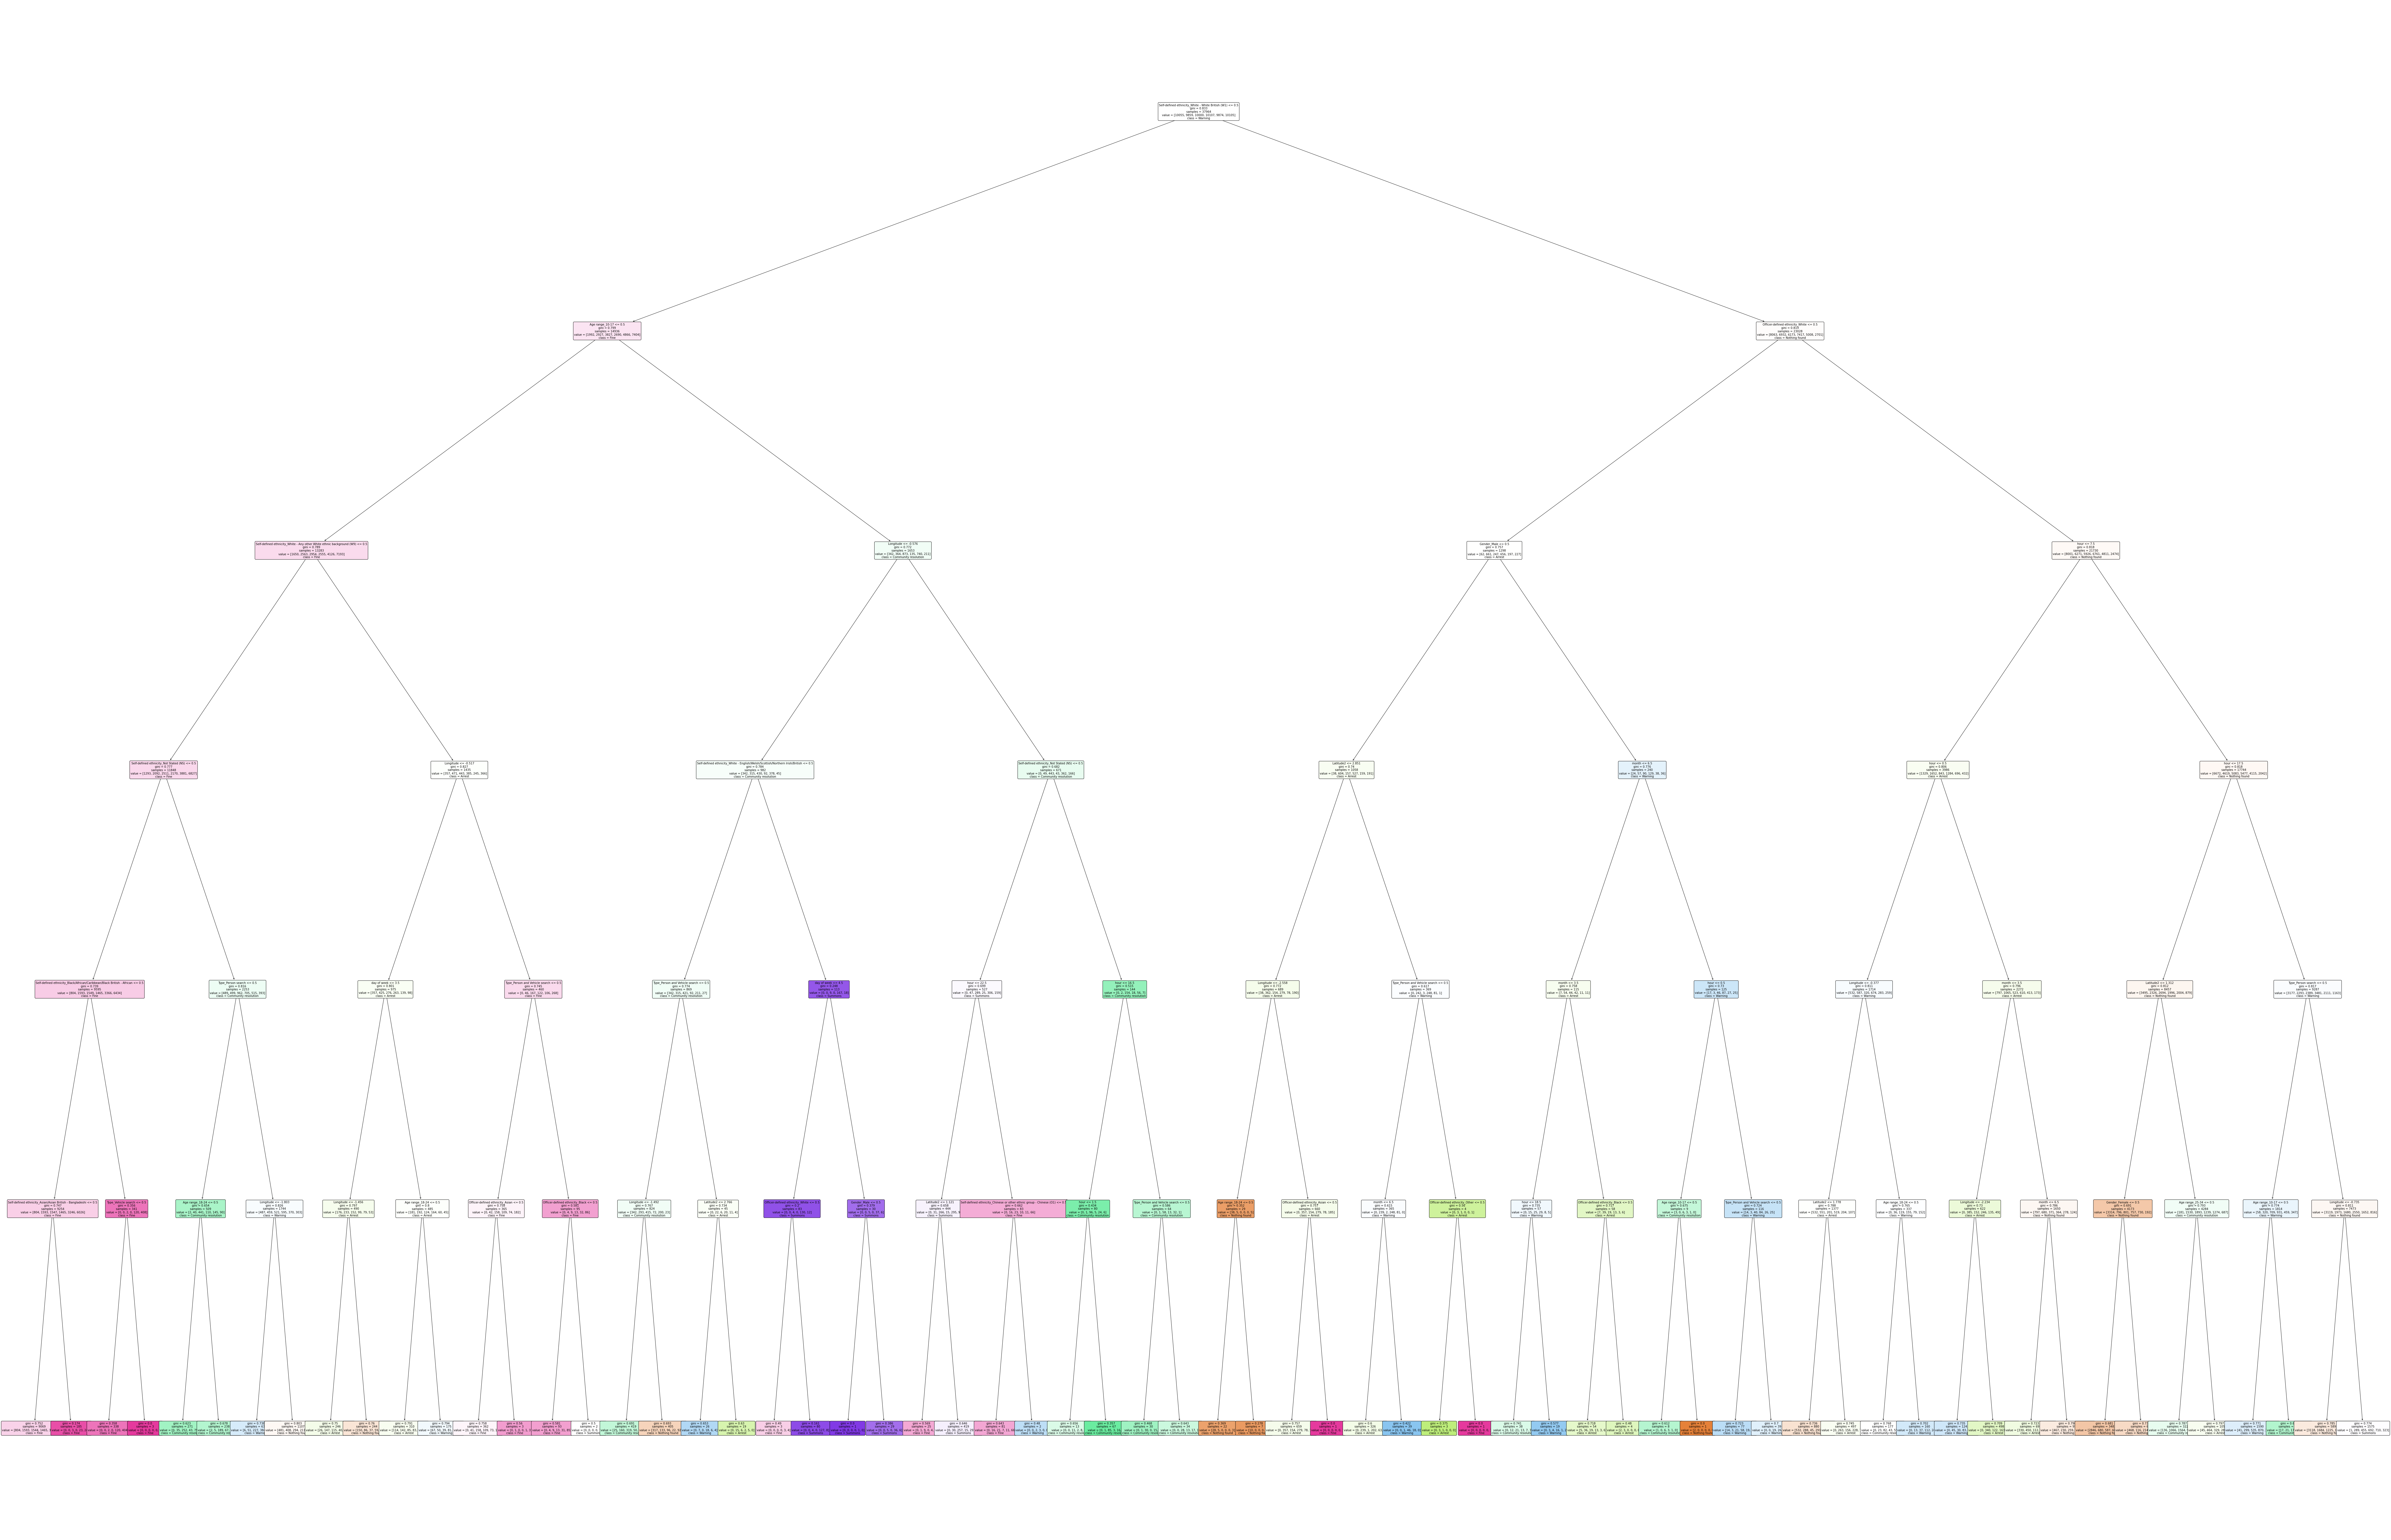

In [137]:
xnames = list(X)
ynames = pd.factorize(Y)[1]
fig = plt.figure(figsize=(150, 100))
plot_tree(model.estimators_[0],filled=True, rounded=True, feature_names=xnames, class_names=ynames, fontsize=10)

plt.show()
fig.savefig("C:\\Users\\20203666\\Downloads\\decistion_tree.png")